# Import Package

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

import joblib

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)})
sns.set_style("whitegrid")

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Import Data

In [2]:
house_train = pd.read_csv("../Data/House_Prices/train.csv")
house_test = pd.read_csv("../Data/House_Prices/test.csv")

In [3]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Exploratt Data Analysis

In [5]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Density of SalePrice

In [7]:
np.random.seed(1234)
simul_normal = np.random.normal(house_train.SalePrice.mean(), house_train.SalePrice.std(), 1460)

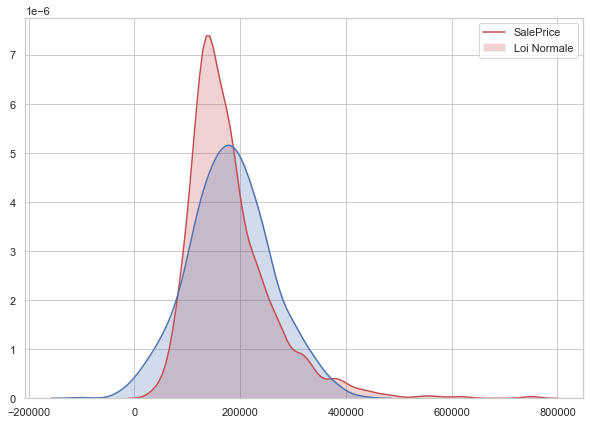

In [8]:
sns.kdeplot(house_train['SalePrice'], color="r", shade=True)
sns.kdeplot(simul_normal, color="b", shade=True)
plt.legend(labels=['SalePrice','Loi Normale'])

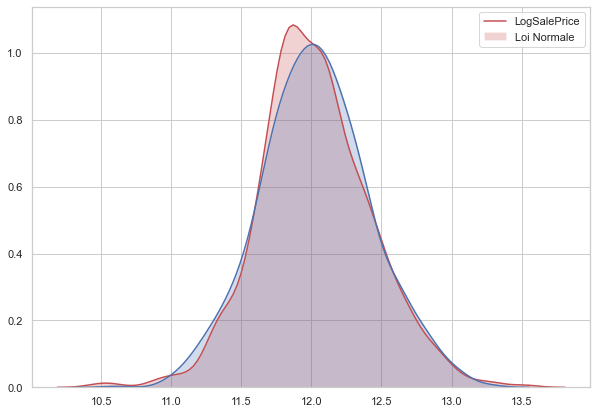

In [9]:
LogSalePrice=np.log1p(house_train.SalePrice)
np.random.seed(1234)
sns.kdeplot(LogSalePrice, color="r", shade=True)
sns.kdeplot(np.random.normal(LogSalePrice.mean(), LogSalePrice.std(), 1460), color="b", shade=True)
plt.legend(labels=['LogSalePrice','Loi Normale'])

## HeatMap for numeric columns

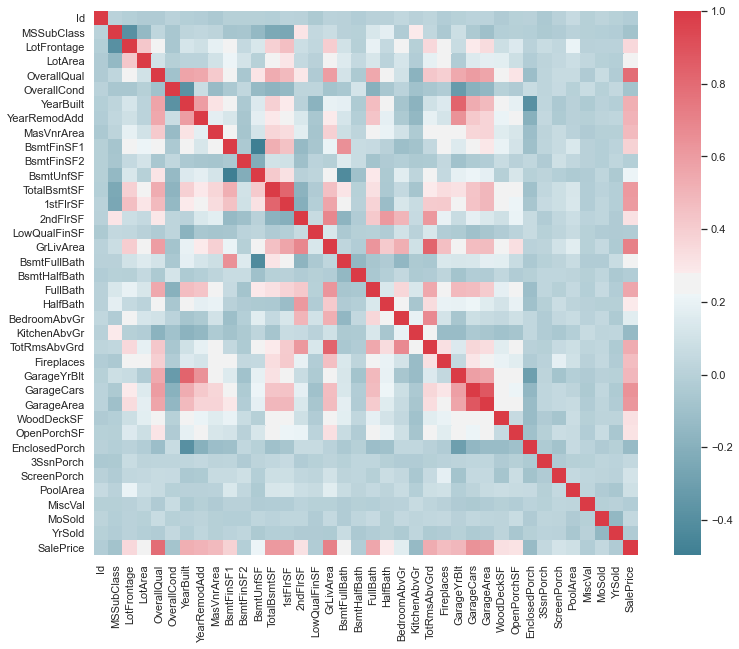

In [10]:
house_corr = house_train.corr()
plt.subplots(figsize=(13,10))
cmap= sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(house_corr, cmap=cmap, square=True)
#sns.clustermap(house_corr, cmap='coolwarm')

In [11]:
var_num_select = house_corr[(house_corr.SalePrice>0.5) | (house_corr.SalePrice< -0.5)].index
var_num_select

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

## Data Viz

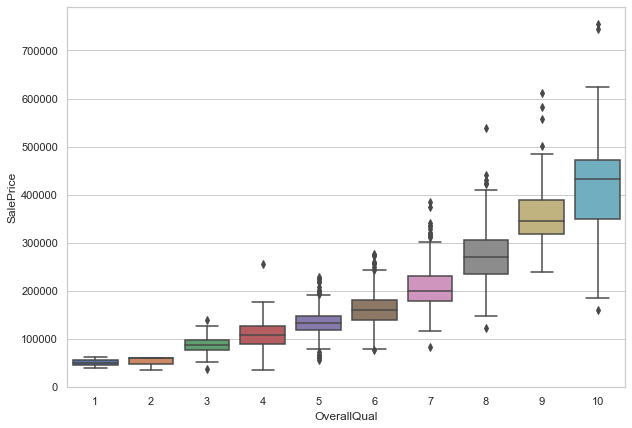

In [12]:
sns.boxplot(house_train.OverallQual,house_train.SalePrice)

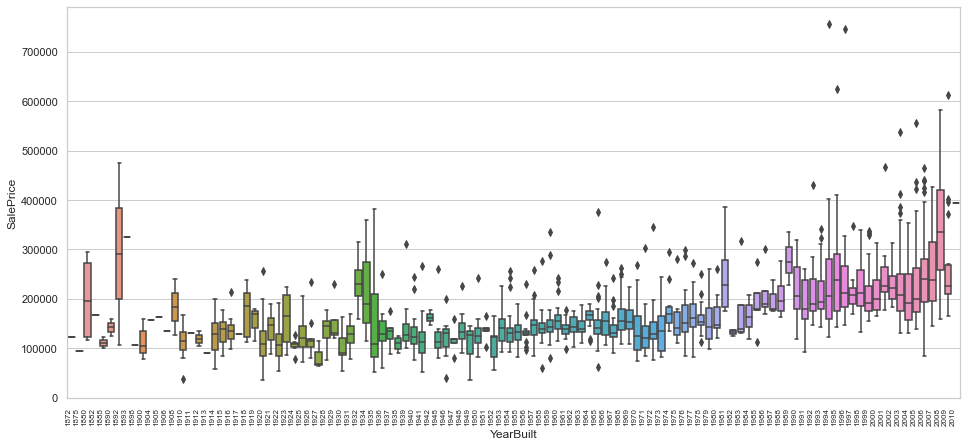

In [13]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(house_train.YearBuilt,house_train.SalePrice)
plt.xticks(fontsize=8)
f.autofmt_xdate(rotation=90)

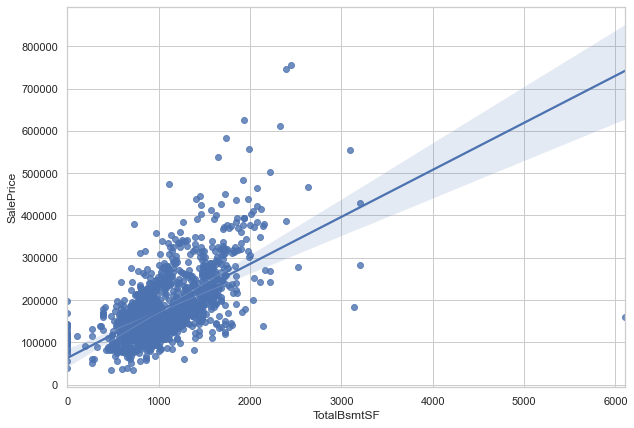

In [14]:
sns.regplot(house_train.TotalBsmtSF,house_train.SalePrice)

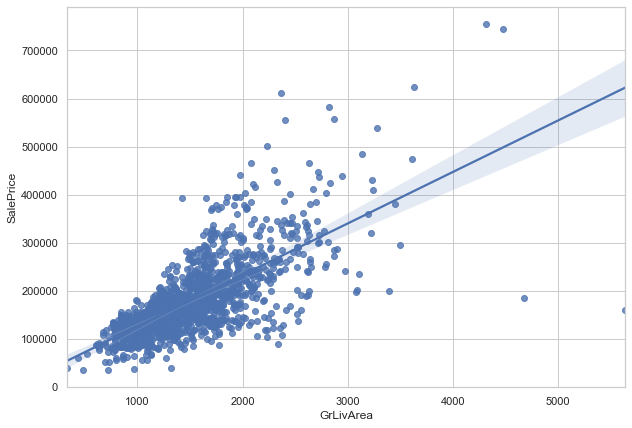

In [15]:
sns.regplot(house_train.GrLivArea,house_train.SalePrice)

# Features engineering

## Drop ID

In [16]:
train_ID = house_train['Id']
test_ID = house_test['Id']

train = house_train.drop("Id", axis = 1)
X_test = house_test.drop("Id", axis = 1)

## Outliers

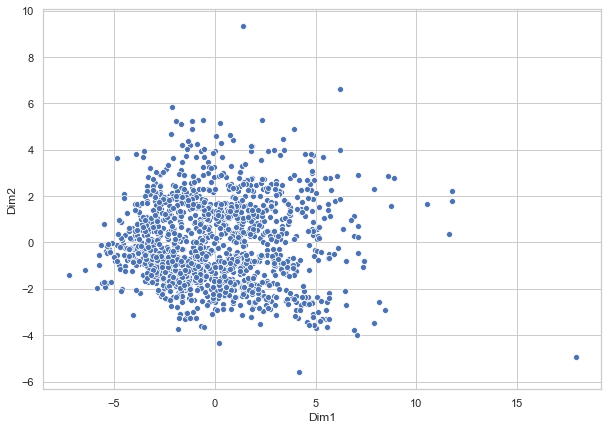

In [17]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=3))
])
res_pca=pipe.fit_transform(train.select_dtypes(['int64', 'float64']))

res_pca_df =  pd.DataFrame({"Dim1" : res_pca[:,0], "Dim2" : res_pca[:,1]})

sns.scatterplot("Dim1", "Dim2", data = res_pca_df)

In [18]:
outliers = res_pca_df.loc[(res_pca_df["Dim2"] < -5.5) | (res_pca_df["Dim2"] > 6) | (res_pca_df["Dim1"] > 10),].index
train.drop(outliers, inplace=True)

In [19]:
y_train = train['SalePrice'].reset_index(drop=True)
y_train = np.log1p(y_train)

train = train.drop('SalePrice', axis=1)

house_data = pd.concat([train, X_test]).reset_index(drop=True)

## Missing values

In [20]:
def missing_values(data):
    sum_na = data.isnull().sum()
    freq_na = sum_na * 100 / len(data)
    missing = pd.concat([sum_na, freq_na], axis=1, keys = ['SumNA', 'FreqNA'])
    missing = missing[missing.SumNA>0]
    return(missing.sort_values('FreqNA', ascending=False))

na_table = missing_values(house_data)
na_table

,SumNA,FreqNA
PoolQC,2903,99.725180
MiscFeature,2806,96.392992
Alley,2714,93.232566
Fence,2342,80.453452
FireplaceQu,1419,48.746135
LotFrontage,486,16.695294
GarageFinish,158,5.427688
GarageQual,158,5.427688
GarageCond,158,5.427688
GarageYrBlt,158,5.427688


In [21]:
col_del = na_table[na_table.FreqNA>30].index
house_data.drop(col_del, axis=1, inplace=True)

In [22]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


## Replace NA

In [23]:
col_quli_na = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtCond', 'BsmtQual', 
'MasVnrType','MasVnrArea']

col_quant_na = ['LotFrontage','GarageYrBlt']


for col in col_quant_na:
    house_data[col] = house_data[col].fillna(0)

for col in col_quli_na:
    house_data[col] = house_data[col].fillna('None')


In [24]:
class CustomImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='median'):
        self.cols = cols
        self.strategy = strategy

    def transform(self, df):
        X = df.copy()
        impute = SimpleImputer(strategy=self.strategy)
        if self.cols == None:
            self.cols = list(X.columns)
        for col in self.cols:
            if X[col].dtype == np.dtype('O') : 
                X[col].fillna(X[col].value_counts().index[0], inplace=True)
            else : X[col] = impute.fit_transform(X[[col]])

        return X

    def fit(self, *_):
        return self


house_data2 = CustomImputer().fit_transform(house_data)

In [25]:
house_data2['Age'] = house_data2.YrSold - house_data2.YearBuilt

house_data2['TotalSF'] = house_data2['TotalBsmtSF'] + house_data2['1stFlrSF'] + house_data2['2ndFlrSF']

house_data2['YrBltAndRemod']=house_data2['YearBuilt']+house_data2['YearRemodAdd']

house_data2['TotalBathrooms'] = (house_data2['FullBath'] + (0.5 * house_data2['HalfBath']) +
                               house_data2['BsmtFullBath'] + (0.5 * house_data2['BsmtHalfBath']))

house_data2['TotalSqrFootage'] = (house_data2['BsmtFinSF1'] + house_data2['BsmtFinSF2'] + 
                                    house_data2['1stFlrSF'] + house_data2['2ndFlrSF'])

house_data2['TotalPorch'] = (house_data2['OpenPorchSF'] + house_data2['3SsnPorch'] +
                              house_data2['EnclosedPorch'] + house_data2['ScreenPorch'] +
                              house_data2['WoodDeckSF'])

In [26]:
#house_data2.MSZoning=house_data2.MSZoning.replace("C (all)", "C")

# Model

In [27]:
numerical_ix = house_data2.select_dtypes(['int64', 'float64']).columns
categorical_ix = house_data2.select_dtypes('object').columns

#col_transform = ColumnTransformer(transformers=[
    #('cat', pd.get_dummies(drop_first=True), categorical_ix), 
  #  ('num', StandardScaler(), numerical_ix)
  #  ])

house_prepared=pd.get_dummies(house_data2,drop_first=True)
#house_prepared = col_transform.fit_transform(house_prepared)


In [28]:
X_train = house_prepared.iloc[:len(train),:]
X_test = house_prepared.iloc[len(train):,:]

In [29]:
# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       #colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [30]:
lightgbm = LGBMRegressor(objective='regression', 
                        num_leaves=4,
                        learning_rate=0.01, 
                        n_estimators=6000,
                        max_bin=200, 
                        bagging_fraction=0.75,
                        bagging_freq=5, 
                        bagging_seed=7,
                        feature_fraction=0.2,
                        feature_fraction_seed=7,
                        verbose=-1
                        )

In [31]:
# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas))

In [32]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

In [33]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

## Fit the models

In [34]:

def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, 
                            scoring='neg_mean_absolute_error', 
							cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [35]:
def get_stacking():
    level0 = list()
    level0.append(('rf', rf))
    level0.append(('svm', svr))
    level0.append(('gbr', gbr))
    level0.append(('ridge', ridge))
    level0.append(('xgboost', xgboost))
    level0.append(('lightgbm', lightgbm))
    level1 = xgboost
    model_stack = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model_stack

def get_models():
    models = dict()
    models['rf'] = rf
    models['xgboost'] = xgboost
    models['lightgbm'] = lightgbm
    models['svm'] = svr
    models['gbr'] = gbr
    models['ridge'] = ridge
    models['stacking'] = get_stacking()
    return models

models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.4f (%.4f)' % (name, scores.mean(), scores.std()))


>rf -0.0945 (0.0070)
>xgboost -0.0923 (0.0079)
>lightgbm -0.0771 (0.0061)
>svm -0.1076 (0.0115)
>gbr -0.0734 (0.0067)
>ridge -0.0797 (0.0069)
>stacking -0.0764 (0.0073)


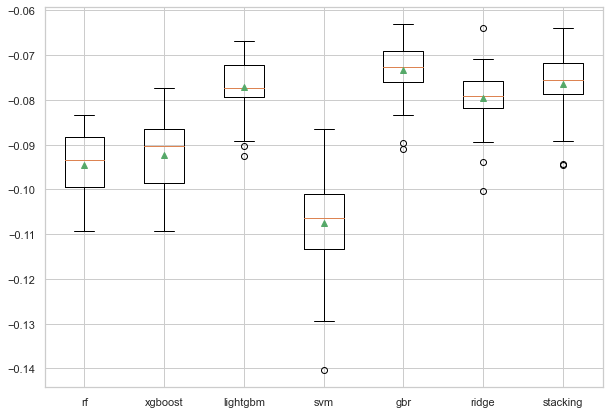

In [41]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [43]:
joblib.dump(results, 'results_models.pkl') 

['results_models.pkl']

In [36]:
model_stack = get_stacking()

In [37]:
stack_fit = model_stack.fit(X_train, y_train)
rf_fit = rf.fit(X_train, y_train)
gbr_fit = gbr.fit(X_train, y_train)
xgboost_fit = xgboost.fit(X_train, y_train)
lightgbm_fit = lightgbm.fit(X_train, y_train)
ridge_fit = ridge.fit(X_train, y_train)
svr_fit = svr.fit(X_train, y_train)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 w

In [38]:
def blend_predict(X_train):
    return ((0.1 * rf_fit.predict(X_train)) + 
            (0.15 * lightgbm_fit.predict(X_train)) +
            (0.1 * xgboost_fit.predict(X_train)) +
            (0.15 * ridge_fit.predict(X_train)) +
            (0.25 * gbr_fit.predict(X_train)) +
            (0.05 * svr_fit.predict(X_train)) +
            (0.25 * stack_fit.predict(X_train))
            )

np.sqrt(mean_squared_error(y_train, blend_predict(X_train)))

0.6066883127947058

In [42]:
sub_house = pd.read_csv('../Data/House_Prices/sample_submission.csv')
sub_house['SalePrice'] = np.expm1(blend_predict(X_test))
sub_house.to_csv("submission_regression.csv", index=False)

In [40]:
sub_house.SalePrice.describe()


count    1.459000e+03
mean     3.259384e+05
std      1.424909e+05
min      9.362454e+04
25%      2.311125e+05
50%      2.860061e+05
75%      3.842889e+05
max      1.093145e+06
Name: SalePrice, dtype: float64